In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from tensorboard.backend.event_processing import event_accumulator

In [69]:
# 10 second bins
bin_size = 10

In [70]:
params = {
    'legend.fontsize': 'large',
    'figure.figsize': (8, 4), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

In [86]:
def plot_dirs(dirs, savepath=''):

    plt.figure()

    for sketch_name, color, directory in dirs:
        time_loss_dict = [[] for i in range(300)]

        for file in os.listdir(directory):
            path = os.path.join(directory, file)
            ea = event_accumulator.EventAccumulator(path,
                size_guidance={ # see below regarding this argument
                event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                event_accumulator.IMAGES: 4,
                event_accumulator.AUDIO: 4,
                event_accumulator.SCALARS: 0,
                event_accumulator.HISTOGRAMS: 1,
            })

            ea.Reload()

            times = pd.DataFrame(ea.Scalars('training_time'))['value'] // bin_size
            losses = pd.DataFrame(ea.Scalars('test_error'))['value']

            for i in range(len(times)):
    #             print(int(times[i]), losses[i])
                time_loss_dict[int(times[i])].append(losses[i])

    #     print(time_loss_dict)
    #     break

        times = []
        means = []
        stds = []
        for i, entry in enumerate(time_loss_dict):
            if len(entry) > 0:
    #             print(i, len(entry))
                times.append(i*bin_size)
                means.append(np.array(entry).mean())
                stds.append(np.array(entry).std())


    #     print(times)
    #     print(means)
        plt.fill_between(times, np.array(means)-np.array(stds), np.array(means)+np.array(stds), alpha=0.2, color=color)
        plt.plot(times, np.array(means), label=sketch_name, color=color, linewidth=3)
        print(sketch_name, times, np.array(means))

    plt.legend()
    plt.ylim(0,0.1)
    #plt.xlim(0,300)
    plt.xlabel('Training Time [seconds]')
    plt.ylabel('Test Error')
    plt.tight_layout()
    
    if len(savepath) > 0:
        plt.savefig(savepath, dpi=300)
    # plt.xscale('log')
#     plt.yscale('log')
    plt.show()

In [72]:
colors = plt.get_cmap('tab20c')(np.linspace(0, 0.8, 16))[::2]
colors = np.flip(colors, axis=0)

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570] [0.41579047 0.09816429 0.0654475  0.05248718 0.04583871 0.04106667
 0.03664762 0.0332525  0.03097419 0.0291641  0.02774048 0.02656098
 0.02571    0.02512439 0.0245075  0.02406341 0.02368788 0.02353846
 0.02339    0.0232125  0.02316842 0.02266765 0.0228439  0.02280513
 0.02285789 0.02250541 0.02283158 0.02267561 0.02278158 0.02247143
 0.022735   0.0226359  0.0226675  0.02251765 0.0226375  0.02267105
 0.0226878  0.02249714 0.02263077 0.02261026 0.02271026 0.02278421
 0.0225973  0.02276579 0.02273415 0.02265143 0.02254359 0.02276
 0.02273158 0.02264324 0.02259167 0.02263333 0.02263947 0.02251842
 0.02218182 0.02222    0.02198333 0.02196667]
SRF [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 13

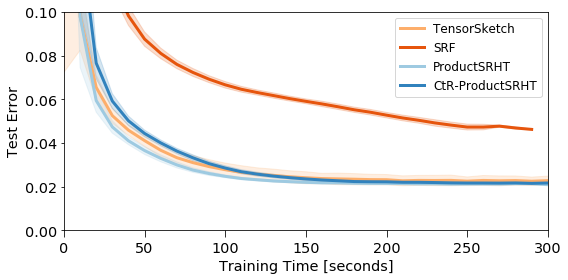

In [73]:
dirs_p3_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_3_comprealFalse_2_lr_0.001_epochs_150'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_3_comprealFalse_2_lr_0.001_epochs_150'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_3_comprealFalse_2_lr_0.001_epochs_150'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_3_comprealTrue_2_lr_0.001_epochs_150')
]

plot_dirs(dirs_p3_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860] [0.5054     0.07       0.05398913 0.04777037 0.04368571 0.04038913
 0.03751957 0.03594348 0.03453696 0.03306087 0.03168605 0.03137692
 0.03033043 0.02964348 0.02875854 0.02880714 0.02823478 0.02775
 0.02767105 0.02697273 0.02683261 0.02663636 0.02620286 0.02659722
 0.02615111 0.02597273 0.02576061 0.02584359 0.02564773 0.0257093
 0.02560313 0.02567805 0.02542667 0.02551628 0.02549032 0.02551905
 0.02537778 0.02547179 0.02547429 0.02544878 0.02549556 0.02547179
 0.02551714 0.02556429 0.0256     0.02537179 0.02590882 0.02566591
 0.02563721 0.02548235 0.02583

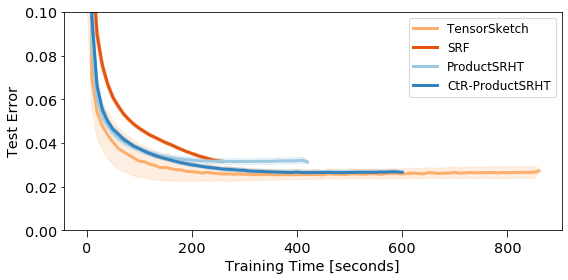

In [83]:
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_6_comprealFalse_2_lr_0.001_epochs_150'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_2_lr_0.001_epochs_150'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealFalse_2_lr_0.001_epochs_150'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealTrue_2_lr_0.001_epochs_150')
]

plot_dirs(dirs_p6_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710] [0.28051035 0.05070833 0.04271667 0.037056   0.03453043 0.03148
 0.03031304 0.02854167 0.028512   0.026988   0.0268     0.02615385
 0.025656   0.02559167 0.025192   0.0254087  0.02512692 0.02502174
 0.025128   0.02517826 0.02513462 0.02514783 0.02522308 0.0251
 0.02517308 0.02516522 0.025472   0.02527083 0.02567917 0.02564
 0.02584091 0.02589565 0.0258619  0.02528    0.025475   0.025425
 0.025475   0.0248     0.0256     0.025825   0.025675   0.02634
 0.025975   0.0263     0.0257     0.026275   0.0264     0.026325
 0.02645    0.02614    0.0266     0.02722    0.026775   0.026625
 0.026975   0.02675    0.026775   0.02735    0.027125

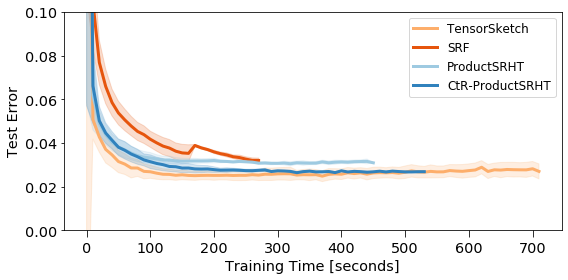

In [82]:
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_6_comprealFalse_3_lr_0.001_epochs_150'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_3_lr_0.001_epochs_150'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealFalse_3_lr_0.001_epochs_150'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealTrue_3_lr_0.001_epochs_150')
]

plot_dirs(dirs_p6_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820] [0.37586666 0.07845    0.06423333 0.05575    0.05146667 0.04765
 0.0454     0.0438     0.04255    0.04123333 0.0401     0.03915
 0.03743333 0.03655    0.0349     0.03415    0.0334     0.0333
 0.03275    0.03196667 0.03175    0.03145    0.03116667 0.0305
 0.02996667 0.02985    0.02955    0.0298     0.0291     0.0291
 0.0288     0.0289     0.0288     0.0282     0.0287     0.028
 0.02835    0.02836667 0.0282     0.0283     0.02825    0.02805
 0.0282     0.0283     0.02796667 0.02785    0.0276     0.0283
 0.0281     0.02823333 0.0276     0.02755    0.02743333 0.0282
 0.02803333 0

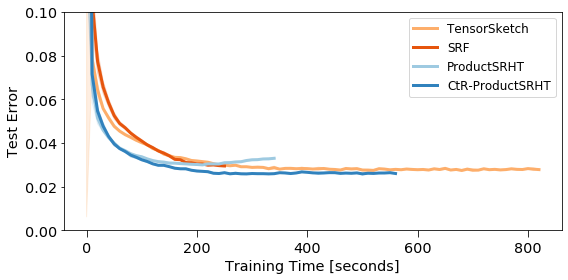

In [87]:
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_6_comprealFalse_3_lr_0.001_epochs_200'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_6_comprealFalse_3_lr_0.001_epochs_200'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealFalse_3_lr_0.001_epochs_200'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_6_comprealTrue_3_lr_0.001_epochs_200')
]

plot_dirs(dirs_p6_10k_tune, savepath='')

TensorSketch [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250] [0.42506029 0.085112   0.05869804 0.04830625 0.042306   0.03843673
 0.03563265 0.03342    0.03174808 0.0306     0.029808   0.02923469
 0.028512   0.028178   0.027852   0.027578   0.02732245 0.02719
 0.027068   0.0270125  0.026826   0.026842   0.026752   0.02676122
 0.02678571 0.02556667]
SRF [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260] [0.37222059 0.10396242 0.07816309 0.06639387 0.05898591 0.05428269
 0.05037315 0.04759371 0.04508182 0.04318562 0.04147613 0.04005714
 0.03877436 0.03747351 0.03616392 0.03502418 0.03398831 0.03309618
 0.03223046 0.03148924 0.03084777 0.03039013 0.02999671 0.02968923
 0.030252   0.03038421 0.03017059]
ProductSRHT [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280,

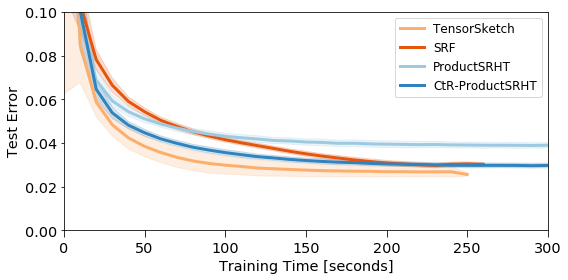

In [74]:
dirs_p7_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_countsketch_scatter_deg_7_comprealFalse_2_lr_0.001_epochs_50'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srf_deg_7_comprealFalse_2_lr_0.001_epochs_150'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_7_comprealFalse_2_lr_0.001_epochs_150'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/sgp_MNIST_proj_srht_deg_7_comprealTrue_2_lr_0.001_epochs_150')
]

plot_dirs(dirs_p7_10k_tune, savepath='')

In [27]:
dirs_p7_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/d10k/p7/ts'),
    ('SRF', colors[5], '../tensorboard_logs/mnist_tune/d10k/p7/srf'),
    ('ProductSRHT', colors[6], '../tensorboard_logs/mnist_tune/d10k/p7/srht'),
    ('CtR-ProductSRHT', colors[7], '../tensorboard_logs/mnist_tune/d10k/p7/srht_comp_real')
]

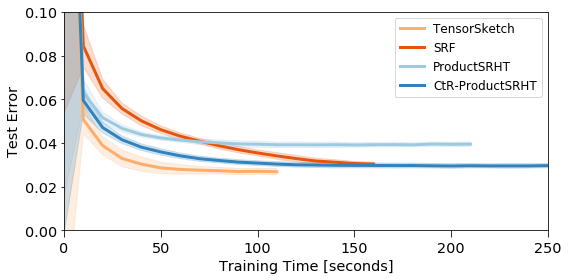

In [28]:
plot_dirs(dirs_p7_10k_tune, savepath='')

In [99]:
dirs_p6_10k_tune = [
    ('TensorSketch', colors[4], '../tensorboard_logs/mnist_tune/d10k/ts'),
    ('TensorSRHT', colors[6], '../tensorboard_logs/mnist_tune/d10k/srht'),
    ('CtR-TensorSRHT', colors[7], '../tensorboard_logs/mnist_tune/d10k/srht_comp_real')
]

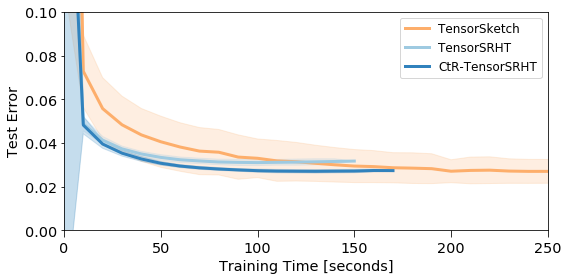

In [100]:
plot_dirs(dirs_p6_10k_tune, savepath='../figures/vi_gp_convergence.pdf')

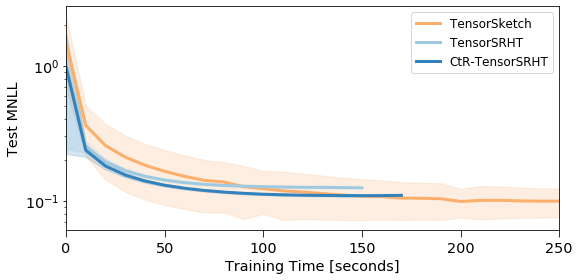

In [118]:
plot_dirs(dirs_p6_10k_tune, savepath='../figures/vi_gp_convergence_train.pdf')